In [43]:
# primeiro importa o csv
import pandas as pd
import matplotlib.pyplot as plt

uri = 'https://raw.githubusercontent.com/Cogitus/Est-dios-Mapinguari/master/tabelas/Tabela%2BReferencia%2BAuditoria%2Bde%2BObras%2BP%C3%BAblicas%2B-%2BAN%C3%81LISE%2BAVAN%C3%87ADA%2B-%2B03%2BEMPRESAS%20-%20Custo%20UnitxQuant%20(Input).csv'

In [44]:
#importando para um objeto Pandas

dados = pd.read_csv(uri)
dados.head()

,ITEM,REFORMA DA PRAÇA MUNICIPAL SÃO JOÃO BATISTA,UND.,QUANT.,PRECO_UNIT_0,PRECO_UNIT_1,PRECO_UNIT_2,PRECO_UNIT_3
0,NaN,1 DEMOLIÇÕES,NaN,NaN,NaN,NaN,NaN,NaN
1,1.1,Demolição de revestimentos de pedras naturais,m²,15.0,18.90,18.70,18.25,18.35
2,1.2,Demolição de revestimentos de pedras naturais,m²,16.0,18.80,18.65,18.20,18.30
3,1.3,Demolição de revestimentos de pedras naturais,m²,17.0,18.70,18.60,18.15,18.25
4,1.4,Demolição de revestimentos de pedras naturais,m²,18.0,18.60,18.55,18.10,18.20


In [45]:
# elimina os NaN

dados = dados.dropna()

In [46]:
# a quinta coluna é o preço contido no edital
# aqui chamamos de PRECO_UNIT

# PRECO_UNIT_0 se refere à referência
# dos preços contidos no edital

qntEmp = dados.shape[1] - 4
qntItems = dados.shape[0]

print(f'{qntEmp} , {qntItems}')

4 , 220


In [47]:
# convertemos pra float, pois essa coluna não estava sendo identificada (type = object)
dados["PRECO_UNIT_0"] = dados.PRECO_UNIT_0.astype(float)
dados["PRECO_UNIT_1"] = dados.PRECO_UNIT_1.astype(float)
dados["PRECO_UNIT_2"] = dados.PRECO_UNIT_2.astype(float)
dados["PRECO_UNIT_3"] = dados.PRECO_UNIT_3.astype(float)


In [48]:
# A coluna com os preços do edital se chama PRECO_UNIT_0
# As colunas com os preços das empresas se chamam PRECO_UNIT_#, com # o numero da empresa
# começando com 1.

# aqui geramos uma lista vazia que conterá 
# os nomes das Pandas.Series para as empresas 
# que estão se aplicando no Edital
lista_de_series_empresas = ['']*qntEmp

# aqui inserimos os nomes das series pandas
for i in range(0,qntEmp):
    print(i)
    serie_title = f'PRECO_UNIT_{i}'
    lista_de_series_empresas[i] = serie_title
    print(lista_de_series_empresas[i])

0
PRECO_UNIT_0
1
PRECO_UNIT_1
2
PRECO_UNIT_2
3
PRECO_UNIT_3


In [49]:
#iremos copiar a lista de nomes
# pra poder usar o metodo list.remove(_)
# sem alterar a lista original
copia_da_lista_empresas = lista_de_series_empresas.copy()
print(copia_da_lista_empresas)

['PRECO_UNIT_0', 'PRECO_UNIT_1', 'PRECO_UNIT_2', 'PRECO_UNIT_3']


In [50]:
tabela_diff_abs_empresas = pd.DataFrame()
tabela_diff_perc_empresas = pd.DataFrame()

for s_t in lista_de_series_empresas: # s_t stands for series_title    
    # remove o primeiro elemento da lista
    copia_da_lista_empresas.remove(s_t)
    for s_t2 in copia_da_lista_empresas:
        #gerando as colunas de diferenças absolutas
        coluna1 = (dados[s_t] - dados[s_t2])
        titulo_da_coluna1 = f'{s_t}_{s_t2}'
        
        #gerando as colunas de diferenças relativas
        coluna2 = 100*((dados[s_t] - dados[s_t2])/dados[s_t])
        titulo_da_coluna2 = f'{s_t}_{s_t2}'
        
        tabela_diff_abs_empresas[titulo_da_coluna1] = coluna1 
        tabela_diff_perc_empresas[titulo_da_coluna2] = coluna2

    
    
    """
    print(copia_da_lista_empresas)
    print(lista_de_series_empresas)
    #
    print(s_t)
    """
    

In [51]:
# exemplo. Apagar depois
contagem_diff_abs = tabela_diff_abs_empresas.groupby(tabela_diff_abs_empresas['PRECO_UNIT_1_PRECO_UNIT_2'].map(lambda x: "%.2f" % x)).size()

In [52]:
# vamos gerar duas listas que recebem 
# as séries oriundas da contagem de repetições
lista_repeticoes_abs = list()
lista_repeticoes_perc = list()

In [53]:
# precisamos dos nomes das colunas do dataframe
# pra poder iterar sobre os dataframes tabela_diff_abs_empresas
# e tabela_diff_perc_empresas

colunas_dataframe_abs = list(tabela_diff_abs_empresas.columns.values) # lista de nomes de colunas em tabela_diff_abs_empresas
colunas_dataframe_perc = list(tabela_diff_perc_empresas.columns.values) # lista de nomes de colunas em tabela_diff_perc_empresas

In [54]:
# agora iremos construir as listas de contagens de repetições

for titulo in colunas_dataframe_abs: # ambos os dataframes possuem o mesmo nome pras colunas
                                    # assim, vamos escolher qualquer um dos dataframes pra 
                                    # ser iterado.
            
    # aqui geraremos as contagens das repetições que existem na coluna nomeada com 'titulo'
    # pro dataframe tabela_diff_perc_empresas e tabela_diff_abs_empresas.
    contagem_abs = tabela_diff_abs_empresas.groupby(tabela_diff_abs_empresas[titulo].map(lambda x: "%.2f" % x)).size()
    contagem_perc = tabela_diff_perc_empresas.groupby(tabela_diff_perc_empresas[titulo].map(lambda x: "%.1f" % x)).size()
    
    # após gerar as contagens precisamos colocá-las nas listas de contagens
      
    lista_repeticoes_abs.append(contagem_abs)
    lista_repeticoes_perc.append(contagem_perc)


In [56]:
for i in range(0,len(lista_repeticoes_abs)):
    lista_repeticoes_abs[i]=lista_repeticoes_abs[i].sort_values(ascending=False)
    lista_repeticoes_perc[i]=lista_repeticoes_perc[i].sort_values(ascending=False)

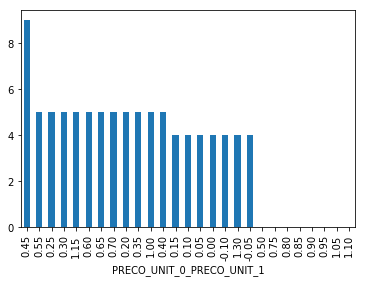

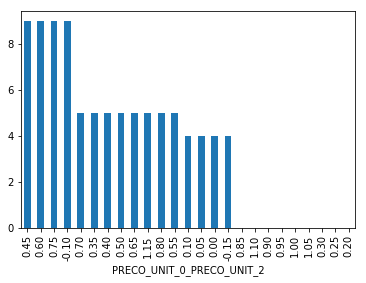

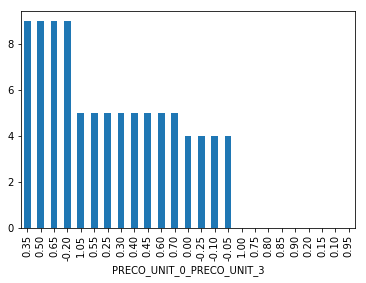

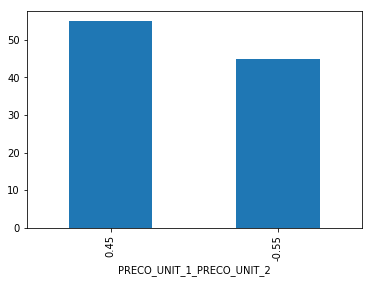

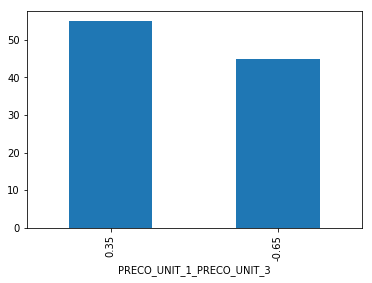

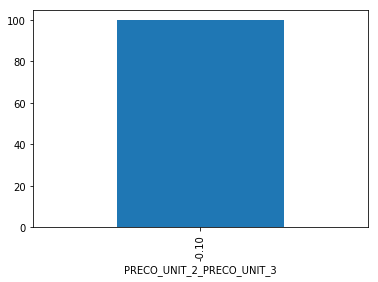

In [57]:
for i in range (0,len(lista_repeticoes_abs)):

    soma = lista_repeticoes_abs[i].astype(float).values.sum()
    
    for j in range(0,len(lista_repeticoes_abs[i])):
        
        lista_repeticoes_abs[i][j]=100*(lista_repeticoes_abs[i][j]/soma)
        lista_repeticoes_perc[i][j]=100*(lista_repeticoes_perc[i][j]/soma)
        
    plt.figure(i)
    lista_repeticoes_abs[i].plot(kind='bar')